# Assignment 2
Project ini untuk memenuhi tugas dari Course Introduction To Python For Data Science

Nama : Yusraini Nurul Asra (PYTN-KS19-017)
Program	: Python for Data Science

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Math, Latex     #untuk menulis markdown persamaan matematika
%matplotlib inline
import seaborn

import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy import stats
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import lilliefors
from statistics import NormalDist
from scipy.stats import gaussian_kde
import plotly.express as px
import statsmodels.api as sm
import warnings

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max.columns',None)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# Convert columns to datetime data type
df["SALE DATE"] = pd.to_datetime(df["SALE DATE"])

In [4]:
# Convert columns to numeric data type
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE"]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' is used to convert invalid values

In [5]:
categorical = []
for i in df.columns[:-1]:
    if i not in numeric:
        categorical.append(i)

for col in categorical: 
    df[col] = df[col].astype("category")

In [6]:
# Convert numeric codes in the "borough" column into area names
renaming_borough = {1: 'Manhattan',
                    2: 'Bronx',
                    3: 'Brooklyn',
                    4: 'Queens',
                    5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].replace(renaming_borough)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [7]:
# Replace blank spaces with NaN
df.replace(' ',np.nan, inplace=True)

In [8]:
pd.DataFrame({
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "type":df.dtypes.values
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,null,null_percentage,unique,type
EASE-MENT,84548,100.000000,0,category
APARTMENT NUMBER,65496,77.466055,3988,category
GROSS SQUARE FEET,27612,32.658372,5690,float64
LAND SQUARE FEET,26252,31.049818,6061,float64
SALE PRICE,14561,17.222170,10007,float64
TAX CLASS AT PRESENT,738,0.872877,10,category
BUILDING CLASS AT PRESENT,738,0.872877,166,category
Unnamed: 0,0,0.000000,26736,category
COMMERCIAL UNITS,0,0.000000,55,int64
BUILDING CLASS AT TIME OF SALE,0,0.000000,166,category


In [9]:
# Delete `Unnamed`
df.drop(["Unnamed: 0","BLOCK", "LOT", "ADDRESS",], axis=1, inplace=True)

## Replace Missing Value
Address missing or unavailable values in your dataset.

2. **EASE-MENT (84548 missing values):**
Kolom "EASE-MENT" memiliki jumlah missing value yang sangat besar,  menunjukkan bahwa mungkin tidak memberikan informasi berharga untuk analisis. Oleh karena itu, `dipertimbangkan untuk menghapusnya` agar menyederhanakan dataset.

In [10]:
# Dropping columns
df.drop('EASE-MENT', axis=1, inplace=True)

4. **APARTMENT NUMBER (65496 missing values):**
Kolom "APARTMENT NUMBER" sebenarnya dapat digunakan untuk analisis, namun lebih baik mengisi nilai yang hilang dengan label khusus seperti untuk mempertahankan signifikansinya. Namun, penggunaan kolom ini adalah opsional apabila tidak ingin digunakan dalam analisis kedepannya.

In [11]:
# Dropping columns
df.drop('APARTMENT NUMBER', axis=1, inplace=True)

6. **GROSS SQUARE FEET (27612 missing values):**
Kolom "LAND SQUARE FEET" berisi data numerik sehingga `rata-rata atau median` adalah penanganan yang tepat untuk menangani data numerik dengan missing value.

In [12]:
# Filling missing values with mean
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)

5. **LAND SQUARE FEET (26252 missing values):**
Kolom "LAND SQUARE FEET" berisi data numerik sehingga `rata-rata atau median` adalah penanganan yang tepat untuk menangani data numerik dengan missing value. Menggunakan rata-rata dapat membantu mempertahankan distribusi data secara keseluruhan, sementara menggunakan median adalah pendekatan yang lebih kuat dan kurang sensitif terhadap pencilan.

In [13]:
# Filling missing values with mean
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)

7. **SALE PRICE (14561 missing values):**
Kolom "SALE PRICE" mewakili harga jual properti. Untuk data numerik seperti ini, missing value dapat ditangani dengan rata-rata, median, atau nol untuk mempertahankan distribusi data. Pemilihan antara rata-rata dan median tergantung pada distribusi data dan sensitivitas terhadap pencilan. Dengan pertimbangan sebagai berikut:
* Jika mengganti missing value dengan nilai nol, rata-rata dan median akan menurun secara signifikan. Data yang dihasilkan akan mencerminkan bahwa sebagian besar harga properti adalah nol, yang *mungkin tidak sesuai dengan kenyataan*.
* Jika mengganti missing value dengan `median`, rata-rata dan median akan lebih mendekati nilai-nilai yang sebenarnya. Hal ini akan memengaruhi hasil analisis yang melibatkan statistik deskriptif sehingga `mendapatkan gambaran yang lebih akurat` tentang pusat sebaran.
* Jika mengganti missing value dengan modus akan mengakibatkan semua properti yang hilang harganya memiliki nilai yang sama. Hal ini dapat *mengurangi variasi dalam data dan tidak mencerminkan keragaman*.

In [14]:
# Filling missing values with median
df['SALE PRICE'].fillna(df['SALE PRICE'].median(), inplace=True)

1. **TAX CLASS AT PRESENT (738 missing values):**
Kolom "TAX CLASS AT PRESENT" berisi data kategorikal sehingga `modus` adalah penanganan yang tepat untuk menangani data kategorikal dengan missing value.

In [15]:
# Filling missing values with mode
df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)

3. **BUILDING CLASS AT PRESENT (738 missing values):**
Kolom "BUILDING CLASS AT PRESENT" berisi data kategorikal sehingga `modus` adalah penanganan yang tepat untuk menangani data kategorikal dengan missing value.

In [16]:
# Filling missing values with mode
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

In [17]:
# Cek jumlah Duplikat yang sama persis
df.duplicated().sum()

2785

In [18]:
# add a new "YEAR" column to the DataFrame, extracting the year from the "SALE DATE" column
df["YEAR"] = [i.year for i in df["SALE DATE"]]

# modifies the "BUILDING CLASS AT PRESENT" column by replacing its values with their first characters
df["BUILDING CLASS AT PRESENT"] = df["BUILDING CLASS AT PRESENT"].str[0]

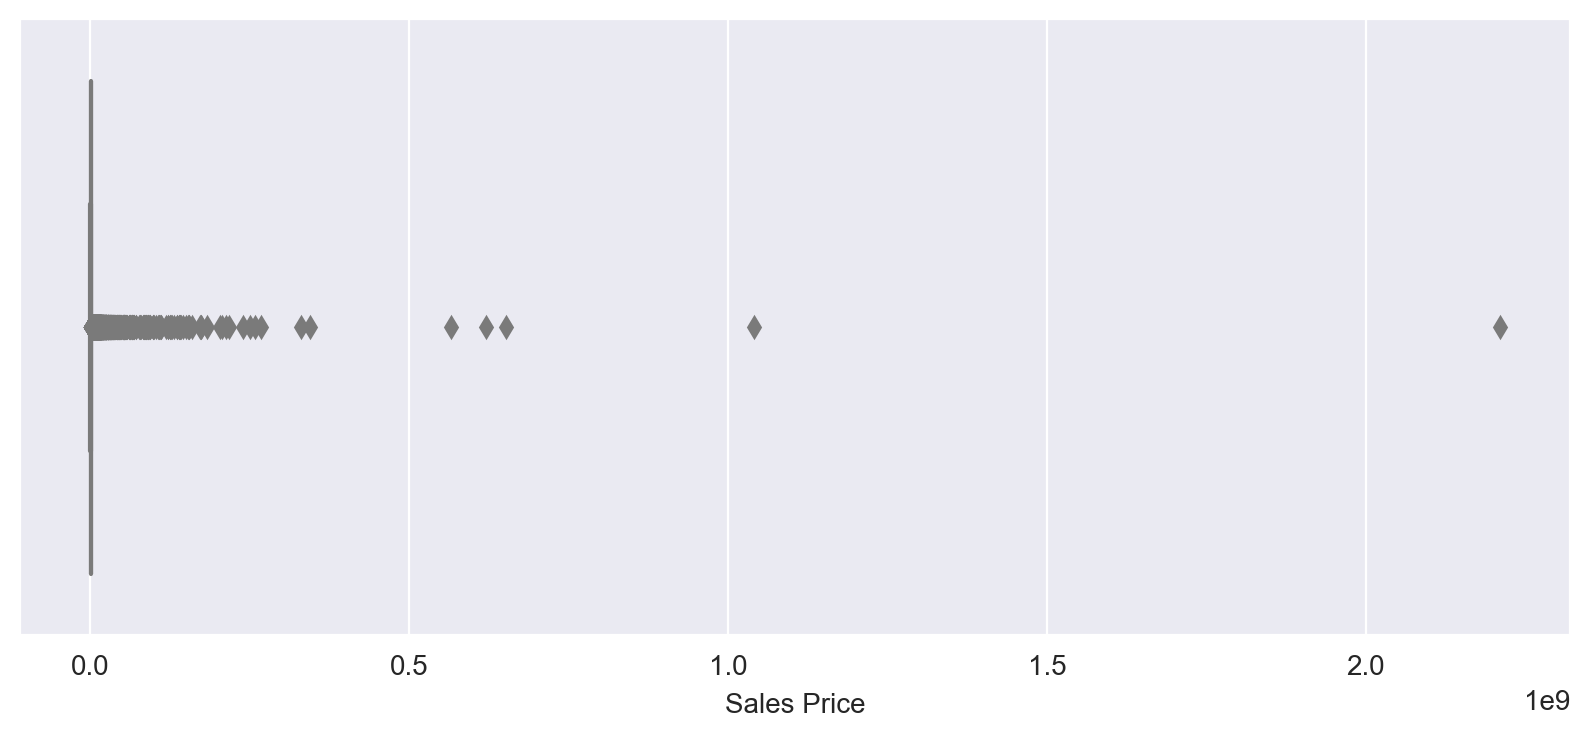

In [19]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df,x="SALE PRICE",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

In [20]:
sale_price_q1 = df["SALE PRICE"].describe().loc["25%"]
sale_price_q3 = df["SALE PRICE"].describe().loc["75%"]
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

df_without_outliers = df[(df["SALE PRICE"] >= sale_price_lower_limit) & (df["SALE PRICE"] <= sale_price_upper_limit)]
df_without_outliers.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14,2016
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09,2016
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,20,0,20,2581.0,9730.0,1900,2,C4,530000.0,2017-07-20,2017
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,44,2,46,5163.0,21007.0,1900,2,C7,530000.0,2017-07-20,2017
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D,10009,15,0,15,1534.0,9198.0,1920,2,D5,530000.0,2017-06-20,2017


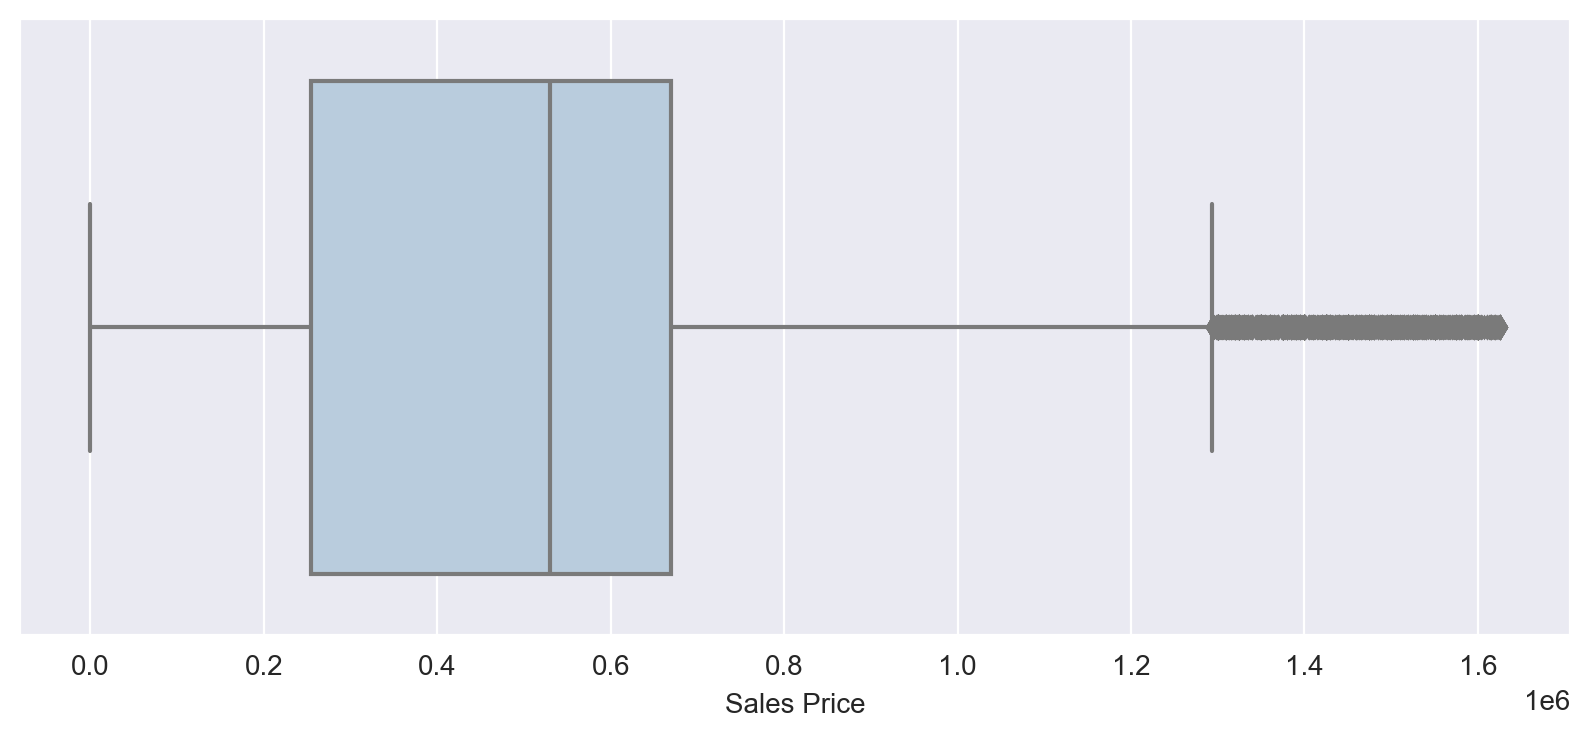

In [21]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df_without_outliers,x="SALE PRICE",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

In [22]:
n = 1
limit = 2

while n <= limit:
    sale_price_q1 = df_without_outliers["SALE PRICE"].describe().loc["25%"]
    sale_price_q3 = df_without_outliers["SALE PRICE"].describe().loc["75%"]
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    df_without_outliers = df_without_outliers[(df_without_outliers["SALE PRICE"] >= sale_price_lower_limit) & 
                                              (df_without_outliers["SALE PRICE"] <= sale_price_upper_limit)]
    
    n += 1
    
df_without_outliers.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14,2016
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09,2016
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,20,0,20,2581.0,9730.0,1900,2,C4,530000.0,2017-07-20,2017
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,C,10009,44,2,46,5163.0,21007.0,1900,2,C7,530000.0,2017-07-20,2017
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D,10009,15,0,15,1534.0,9198.0,1920,2,D5,530000.0,2017-06-20,2017


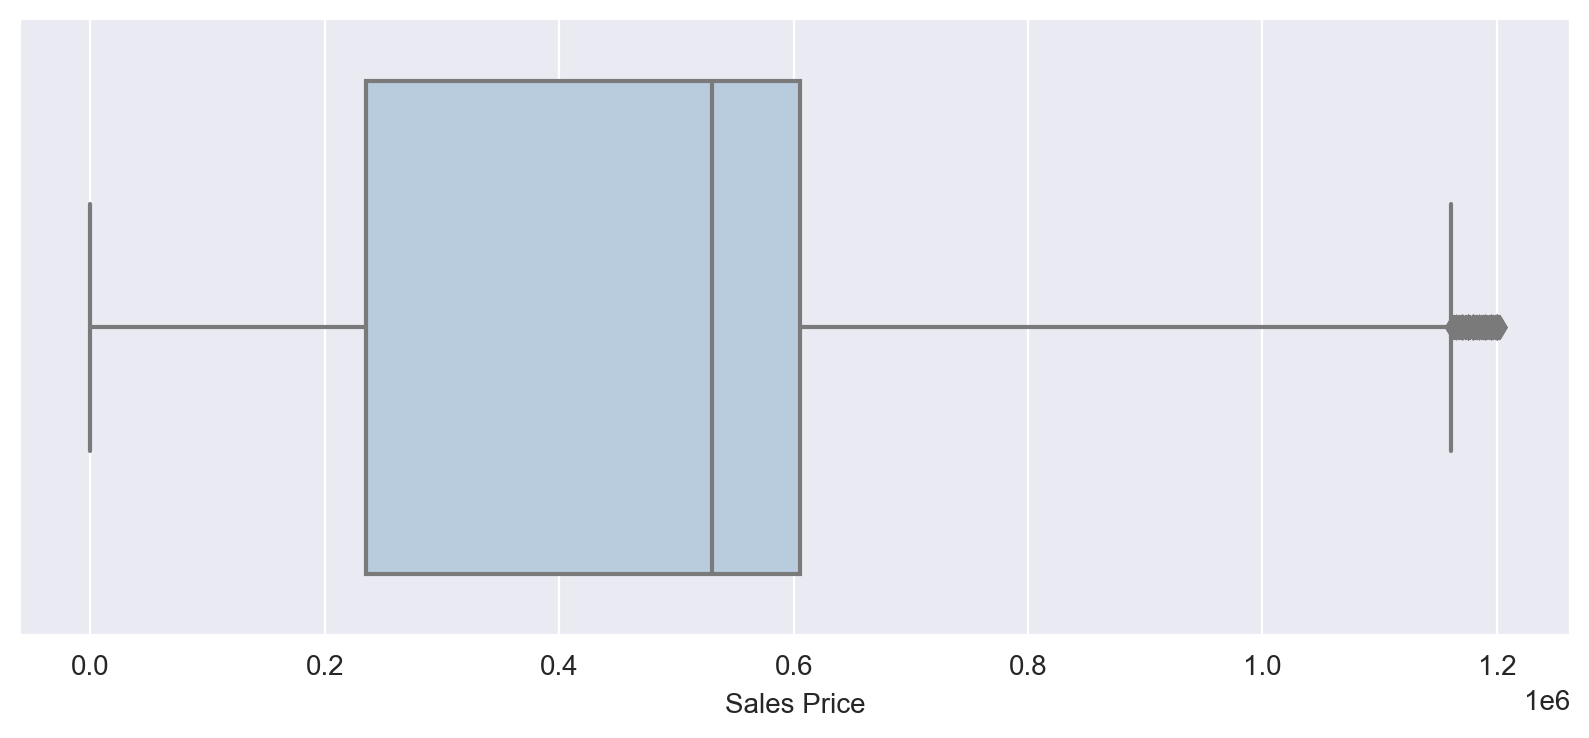

In [23]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df_without_outliers,x="SALE PRICE",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

         BOROUGH     SALE PRICE
0      Manhattan  618574.885256
1          Bronx  273872.790496
2       Brooklyn  341822.896140
3         Queens  510330.041657
4  Staten Island  484420.351420


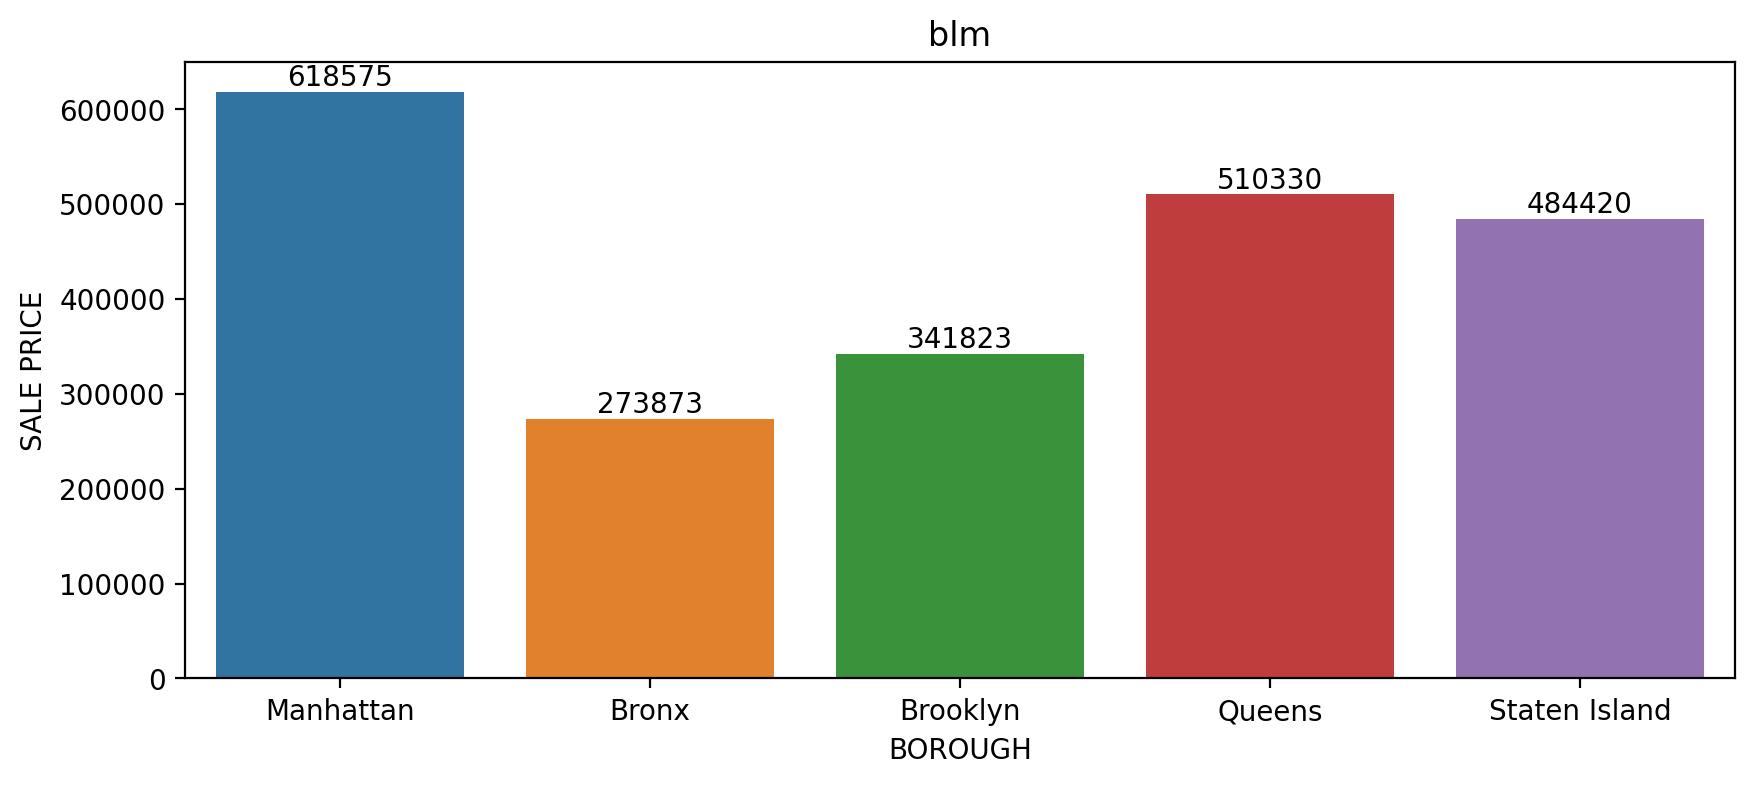

In [24]:
# Group by 'BOROUGH', then calculate the mean of 'SALE PRICE'
mean_sale_price = df_without_outliers.groupby(['BOROUGH'])['SALE PRICE'].mean().reset_index()

# Print the result
print(mean_sale_price)

plt.figure(figsize=(10,4),dpi=200)
ax = sns.barplot(data=mean_sale_price,x='BOROUGH', y='SALE PRICE')

for i in ax.containers:
    ax.bar_label(i,)

plt.title("blm")
plt.show()

         BOROUGH  GROSS SQUARE FEET
0      Manhattan        4045.707479
1          Bronx        1690.000000
2       Brooklyn        1424.000000
3         Queens        2348.000000
4  Staten Island        1800.000000


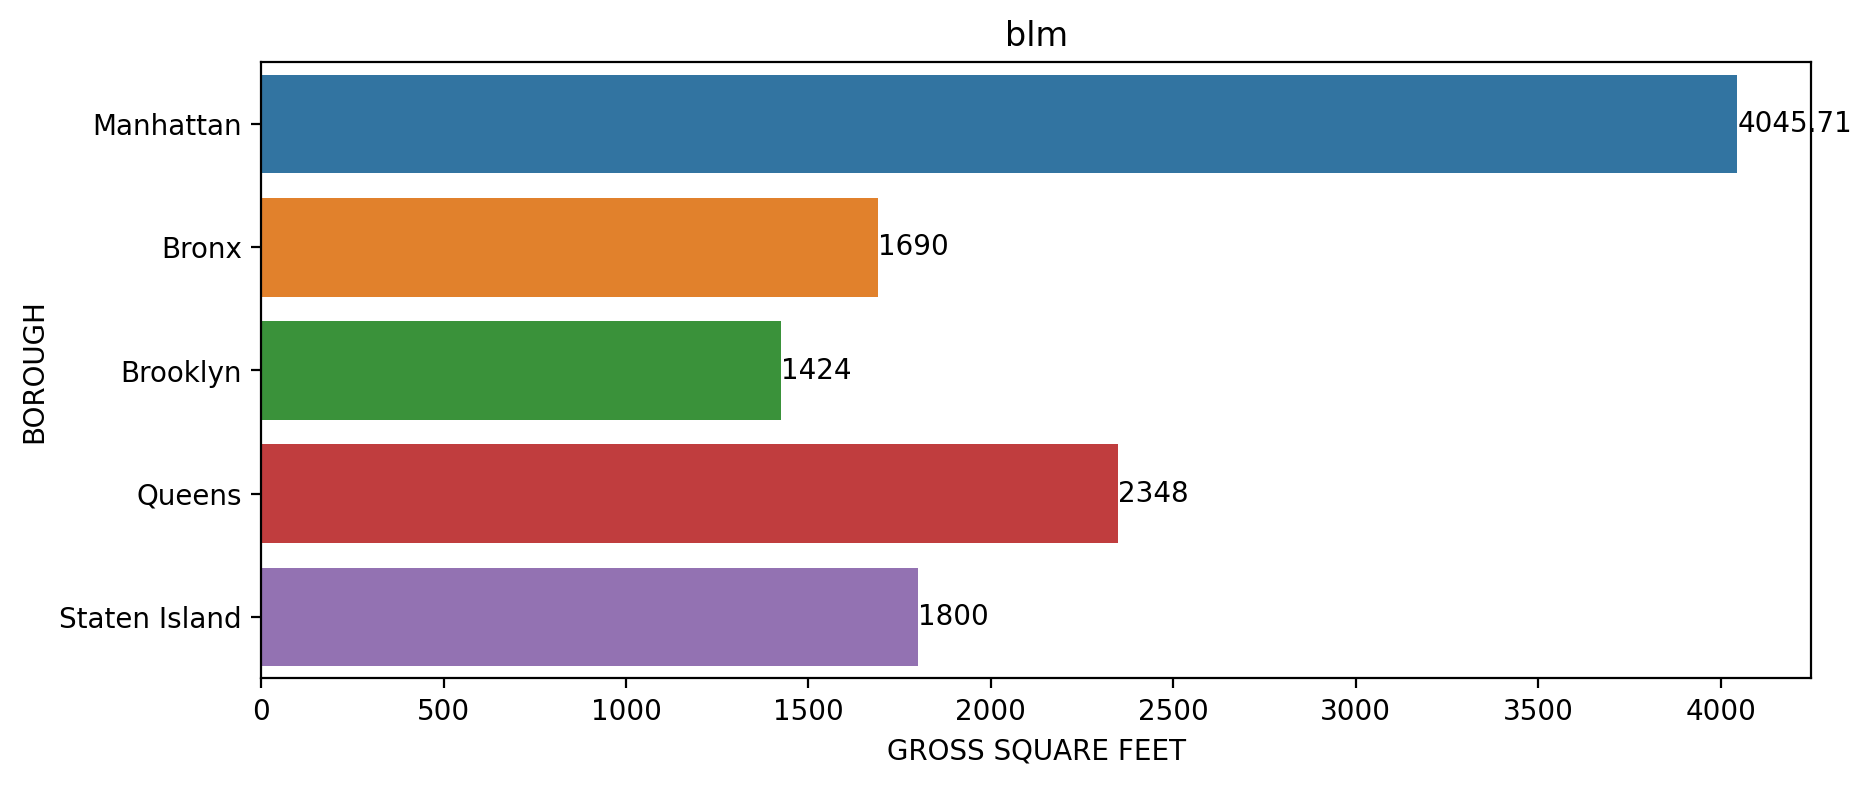

In [25]:
# Group by 'BOROUGH', then calculate the median of 'GROSS SQUARE FEET'
median_sale_price = df_without_outliers.groupby(['BOROUGH'])['GROSS SQUARE FEET'].median().reset_index()

# Print the result
print(median_sale_price)

plt.figure(figsize=(10,4),dpi=200)
ax = sns.barplot(data=median_sale_price,y='BOROUGH', x='GROSS SQUARE FEET',orient='h')

for i in ax.containers:
    ax.bar_label(i,)

plt.title("blm")
plt.show()

In [26]:
# Calculate the mode of BUILDING CLASS CATEGORY
mode_building_class = df_without_outliers['BUILDING CLASS CATEGORY'].mode().iloc[0]

# Calculate the frequency of each BUILDING CLASS CATEGORY
building_class_counts_df = df_without_outliers['BUILDING CLASS CATEGORY'].value_counts().reset_index()

# Create a DataFrame from the frequency calculations
building_class_counts_df.columns = ['BUILDING CLASS CATEGORY', 'Counts']

print(building_class_counts_df)

                         BUILDING CLASS CATEGORY  Counts
0    01 ONE FAMILY DWELLINGS                       17436
1    02 TWO FAMILY DWELLINGS                       14547
2    10 COOPS - ELEVATOR APARTMENTS                11155
3    13 CONDOS - ELEVATOR APARTMENTS                8288
4    03 THREE FAMILY DWELLINGS                      3760
5    09 COOPS - WALKUP APARTMENTS                   2590
6    07 RENTALS - WALKUP APARTMENTS                 2347
7    04 TAX CLASS 1 CONDOS                          1578
8    44 CONDO PARKING                               1433
9    05 TAX CLASS 1 VACANT LAND                     1190
10   15 CONDOS - 2-10 UNIT RESIDENTIAL               957
11   17 CONDO COOPS                                  941
12   12 CONDOS - WALKUP APARTMENTS                   866
13   22 STORE BUILDINGS                              649
14   14 RENTALS - 4-10 UNIT                          479
15   29 COMMERCIAL GARAGES                           452
16   31 COMMERCIAL VACANT LAND 

In [27]:
# Create a horizontal bar plot
fig = px.bar(building_class_counts_df, x='Counts', y='BUILDING CLASS CATEGORY', orientation='h',
             color='BUILDING CLASS CATEGORY',
             title=f"Modus BUILDING CLASS CATEGORY: {mode_building_class}",
             width=1500,  # Set the width of the graph
             height=600  # Set the height of the graph
            )

# Show the plot
fig.show()

## Range
Range is a statistical term that refers to the difference between the maximum and minimum values in a dataset.

**Mengetahui range untuk residential units, commercial units, total units, land square feet, gross square feet, dan sale price per boroughnya**

In [28]:
# Range for Resedential Units
min_max_residential = df_without_outliers.groupby('BOROUGH')['RESIDENTIAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_residential.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_residential)

#Overall Range
min_residential_units = df['RESIDENTIAL UNITS'].min()
max_residential_units = df['RESIDENTIAL UNITS'].max()
print("Overall Range for RESIDENTIAL UNITS:", min_residential_units, "-", max_residential_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0     1641   1641
1          Bronx        0      716    716
2       Brooklyn        0      889    889
3         Queens        0     1844   1844
4  Staten Island        0      143    143
Overall Range for RESIDENTIAL UNITS: 0 - 1844


In [29]:
# Range for Commercial Units
min_max_commercial = df_without_outliers.groupby('BOROUGH')['COMMERCIAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_commercial.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_commercial)

#Overall Range
min_commercial_units = df['COMMERCIAL UNITS'].min()
max_commercial_units = df['COMMERCIAL UNITS'].max()
print("Overall Range for COMMERCIAL UNITS:", min_commercial_units, "-", max_commercial_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0      422    422
1          Bronx        0       20     20
2       Brooklyn        0      184    184
3         Queens        0     2261   2261
4  Staten Island        0      126    126
Overall Range for COMMERCIAL UNITS: 0 - 2261


In [30]:
# Range for Total Units
min_max_totalunits = df_without_outliers.groupby('BOROUGH')['TOTAL UNITS'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_totalunits.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_totalunits)

#Overall Range
min_total_units = df['TOTAL UNITS'].min()
max_total_units = df['TOTAL UNITS'].max()
print("Overall Range for TOTAL UNITS:", min_total_units, "-", max_total_units)

         BOROUGH  Minimum  Maximum  Range
0      Manhattan        0     1653   1653
1          Bronx        0      736    736
2       Brooklyn        0      889    889
3         Queens        0     2261   2261
4  Staten Island        0      143    143
Overall Range for TOTAL UNITS: 0 - 2261


In [31]:
# Range for Land Square Feet
min_max_land = df_without_outliers.groupby('BOROUGH')['LAND SQUARE FEET'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_land.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_land)

#Overall Range
min_land_square = df['LAND SQUARE FEET'].min()
max_land_square = df['LAND SQUARE FEET'].max()
print("Overall Range for LAND SQUARE FEET:", min_land_square, "-", max_land_square)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan     88.0   364000.0   363912.0
1          Bronx      0.0   491293.0   491293.0
2       Brooklyn      0.0   970000.0   970000.0
3         Queens      7.0  4228300.0  4228293.0
4  Staten Island    102.0  2128899.0  2128797.0
Overall Range for LAND SQUARE FEET: 0.0 - 4252327.0


In [32]:
# Range for Gross Square Feet
min_max_gross = df_without_outliers.groupby('BOROUGH')['GROSS SQUARE FEET'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_gross.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_gross)

#Overall Range
min_gross_square = df['GROSS SQUARE FEET'].min()
max_gross_square = df['GROSS SQUARE FEET'].max()
print("Overall Range for GROSS SQUARE FEET:", min_gross_square, "-", max_gross_square)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan    225.0  2155492.0  2155267.0
1          Bronx      0.0  1303935.0  1303935.0
2       Brooklyn      0.0  1330743.0  1330743.0
3         Queens    200.0  3750565.0  3750365.0
4  Staten Island    200.0   683200.0   683000.0
Overall Range for GROSS SQUARE FEET: 0.0 - 3750565.0


In [33]:
# Range for Sale Price
min_max_saleprice = df_without_outliers.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
min_max_saleprice.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']
print(min_max_saleprice)

#Overall Range
min_saleprice = df['SALE PRICE'].min()
max_saleprice = df['SALE PRICE'].max()
print("Overall Range for SALE PRICE:", min_saleprice, "-", max_saleprice)

         BOROUGH  Minimum    Maximum      Range
0      Manhattan      1.0  1201535.0  1201534.0
1          Bronx      0.0  1200000.0  1200000.0
2       Brooklyn      0.0  1202000.0  1202000.0
3         Queens      1.0  1202286.0  1202285.0
4  Staten Island      1.0  1200000.0  1199999.0
Overall Range for SALE PRICE: 0.0 - 2210000000.0


## Variance
Variance is a statistical measure that quantifies the degree of spread or dispersion in a set of data points.

**Mengetahui perbedaan varians untuk residential units dan commercial units**

In [34]:
# Calculate variance
var_residential = df_without_outliers['RESIDENTIAL UNITS'].var()
var_commercial = df_without_outliers['COMMERCIAL UNITS'].var()
var_total = df_without_outliers['TOTAL UNITS'].var()

# Display variance
print("Variance for RESIDENTIAL UNITS:", var_residential)
print("Variance for COMMERCIAL UNITS:", var_commercial)
print("Difference for RESIDENTIAL and COMMERCIAL UNITS:", var_residential - var_commercial)
print("Variance for TOTAL UNITS:", var_total)

Variance for RESIDENTIAL UNITS: 232.76338374552154
Variance for COMMERCIAL UNITS: 80.83424364978278
Difference for RESIDENTIAL and COMMERCIAL UNITS: 151.92914009573877
Variance for TOTAL UNITS: 317.18786578641874


**Coclusion:** Varians adalah ukuran seberapa jauh data dalam setiap jenis unit tersebut menyebar dari nilai rata-rata (mean). Varians yang lebih besar menunjukkan bahwa data memiliki variasi yang lebih besar, atau data lebih tersebar dari nilai rata-rata. Berdasarkan hasil di atas, dapat disimpulkan bahwa `residential units (232,76) memiliki varians yang lebih tinggi dibandingkan dengan commercial units (80,83)` dengan selisih 151.93.

## Standard Deviation
Standard Deviation is a statistical measure that quantifies the amount of variation or dispersion in a set of data points.

**Mengetahui perbedaan standar deviasi untuk land square feet dan gross square feet**

In [35]:
# Calculate StdDev
stddev_land = df_without_outliers['LAND SQUARE FEET'].std()
stddev_gross = df_without_outliers['GROSS SQUARE FEET'].std()

# Display StdDev
print("Standard Deviation for LAND SQUARE FEET:", stddev_land)
print("Standard Deviation for GROSS SQUARE FEET:", stddev_gross)
print("Difference for LAND and GROSS SQUARE FEET:", stddev_land - stddev_gross)

Standard Deviation for LAND SQUARE FEET: 27805.01946238555
Standard Deviation for GROSS SQUARE FEET: 27417.60069026211
Difference for LAND and GROSS SQUARE FEET: 387.41877212344116


**Conclusion:** Standar deviasi yang lebih besar menunjukkan bahwa data memiliki variasi yang lebih besar, atau data lebih tersebar dari nilai rata-rata. Perbedaan antara Standar Deviasi LAND dan GROSS SQUARE FEET mengindikasikan sejauh mana ketersebaran luas lahan (LAND SQUARE FEET) berbeda dari ketersebaran luas bangunan kotor (GROSS SQUARE FEET) dalam dataset.

# **Confidence Intervals and Probability Distribution**
<hr>

In [36]:
nyc_df = df_without_outliers.groupby(["BOROUGH","BUILDING CLASS AT PRESENT","YEAR"]).agg({"SALE PRICE":[np.mean]})
nyc_df = nyc_df.reset_index()
nyc_df.columns = ['BOROUGH','BUILDING CLASS AT PRESENT','YEAR','MEAN']
nyc_df = nyc_df.dropna()
nyc_df

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN
0,Manhattan,A,2016,557801.750000
1,Manhattan,A,2017,445076.969697
2,Manhattan,B,2016,562777.777778
3,Manhattan,B,2017,535250.680000
4,Manhattan,C,2016,498606.023560
...,...,...,...,...
243,Staten Island,V,2017,461545.937294
244,Staten Island,W,2016,448461.692308
245,Staten Island,W,2017,530000.000000
248,Staten Island,Z,2016,355000.000000


In [37]:
sort_df = nyc_df[nyc_df["YEAR"] == 2017].sort_values("MEAN",ascending=False).head(5)
sort_df

,BOROUGH,BUILDING CLASS AT PRESENT,YEAR,MEAN
35,Manhattan,R,2017,662787.332051
179,Queens,O,2017,659388.888889
7,Manhattan,D,2017,632719.708627
25,Manhattan,M,2017,628809.428571
167,Queens,I,2017,611428.571429


In [38]:
temp = []
for i,j,k in zip(sort_df["BOROUGH"],sort_df["BUILDING CLASS AT PRESENT"],sort_df["YEAR"]):
    temp.append(df_without_outliers[(df_without_outliers["BOROUGH"] == i) &
                       (df_without_outliers["BUILDING CLASS AT PRESENT"] == j) &
                       (df_without_outliers["YEAR"] == k)])
    
saleprice = np.array(pd.concat(temp)["SALE PRICE"])
saleprice

array([530000., 530000., 875000., ..., 530000., 530000., 530000.])

In [39]:
np.random.seed(807)
sample_means = []
n = 25
for sample in range(0,500):
    sample_values = np.random.choice(a = saleprice, size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

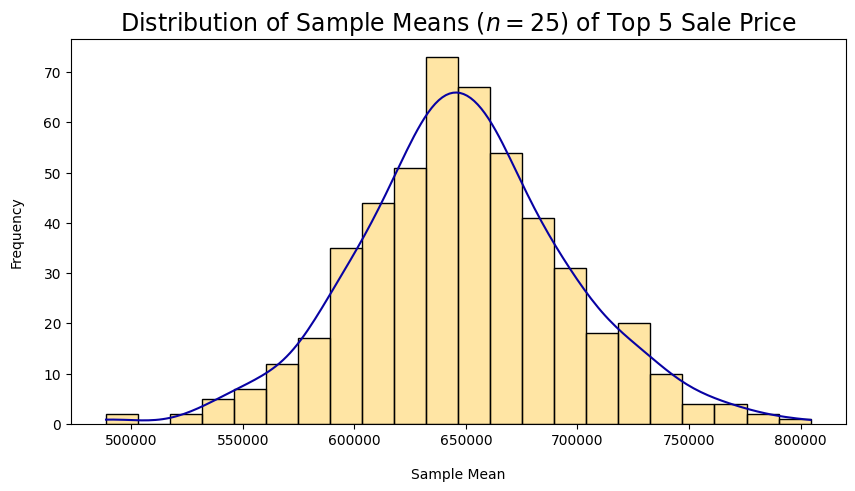

In [40]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.histplot(data=sample_means,kde=True,color="#FFCD4B")
ax.lines[0].set_color("#0802A3")
plt.title("Distribution of Sample Means ($n=25$) of Top 5 Sale Price", fontsize=17)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14);
plt.show()

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



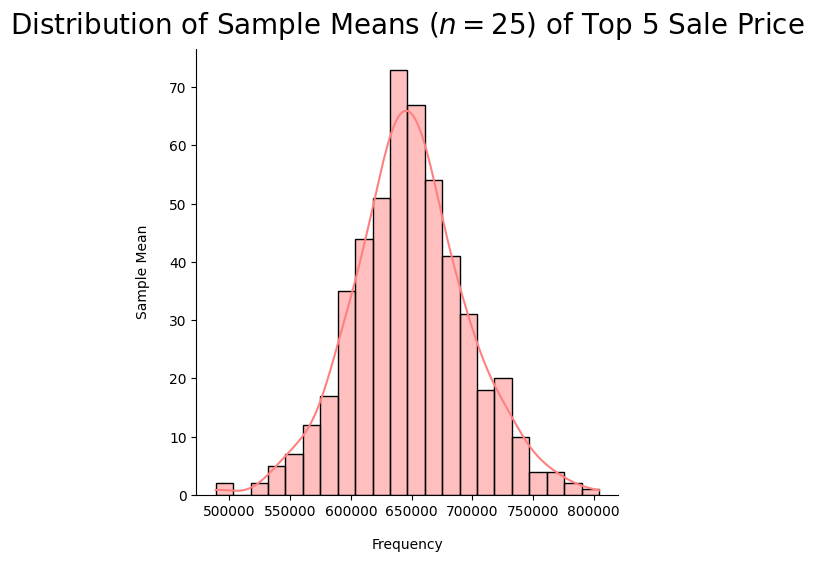

In [41]:
# Or View Distribution using this way
sns.displot(sample_means, color="#FF8080", kde=True)
plt.xlabel("Frequency", labelpad=14)
plt.ylabel("Sample Mean", labelpad=14)
plt.title("Distribution of Sample Means ($n=25$) of Top 5 Sale Price", y=1.015, fontsize=20);

In [42]:
# Calculation Mean
mean = saleprice.mean()
mean

648666.8345852895

In [43]:
# Calculate Standard Deviation
std_dev = saleprice.std()
std_dev

239903.66062524586

In [44]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
print(median_of_sample_means)

# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
print(mean_of_sample_means)

# Calculate Standard Deviation of Sample Means
stdev_of_sample_means = np.std(sample_means)
print(stdev_of_sample_means)

647172.5800000001
648770.6865600001
47290.30085684404


In [45]:
standard_error = std_dev/np.sqrt(n)
standard_error

47980.73212504917

In [46]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [47]:
1 - (tail * 2)

0.950004209703559

In [48]:
lower = mean_of_sample_means - 1.96*standard_error
print(lower)

upper = mean_of_sample_means + 1.96*standard_error
print(upper)

554728.4515949037
742812.9215250964


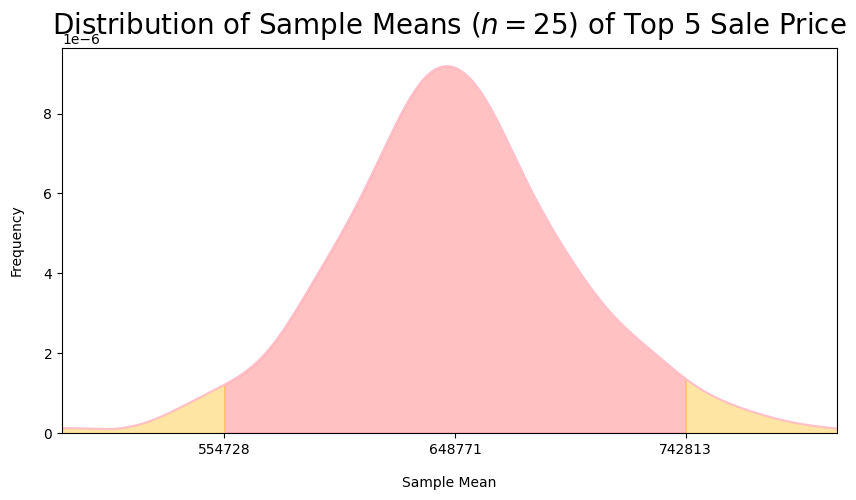

In [49]:
plt.figure(figsize=(10,5),dpi=100)
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='pink')
shade = np.linspace(lower, upper, 300)

plt.fill_between(shade, kde(shade), alpha=0.45, color='#FF7676')
plt.xticks([lower,mean_of_sample_means,upper])
plt.xlim(xmin=np.min(sample_means),xmax=np.max(sample_means))
plt.ylim(ymin=0)

left = np.linspace(np.min(sample_means),lower,10000)
right = np.linspace(upper,np.max(sample_means),10000)
for i in [left,right]:
    plt.fill_between(i,kde(i),color="#FFCD4B",alpha=0.5)

plt.title("Distribution of Sample Means ($n=25$) of Top 5 Sale Price", y=1.015, fontsize=20)
plt.xlabel("Sample Mean", labelpad=14)
plt.ylabel("Frequency", labelpad=14)

plt.show()

**Conclusion:**  Berdasarkan grafik, dapat disimpulkan bahwa terdapat peluang sebesar 95% bahwa rata-rata dari sampel dengan n=25 akan berada dalam area berwarna pink. Dengan demikian, probabilitas bahwa rata-rata dari sampel dengan n=25 akan berada di luar area berwarna pink adalah 100% - 95%.

# **Hypothesis Testing**
<hr>

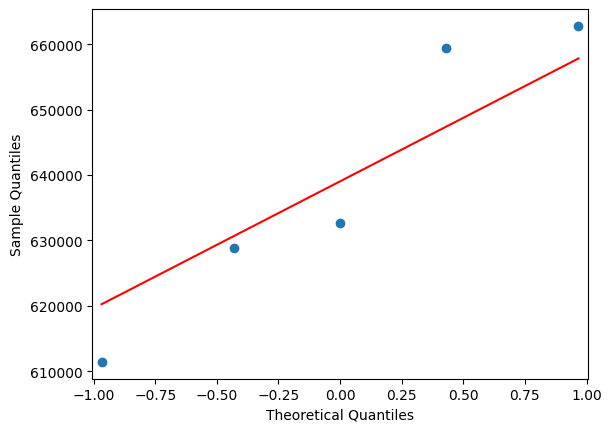

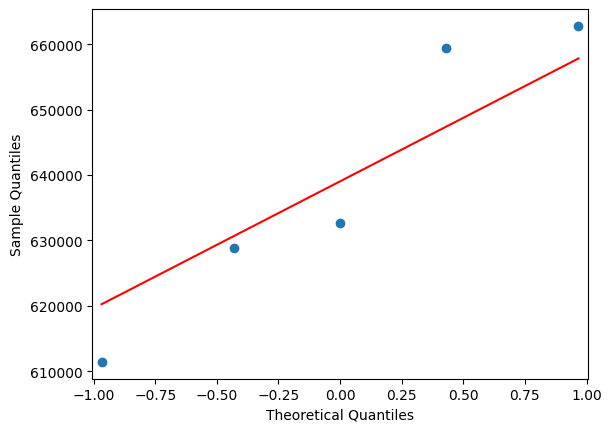

In [50]:
# Create a Q-Q plot for visual normality test
sm.qqplot(sort_df['MEAN'], line='s') 

**Description:** Q-Q plot adalah plot yang digunakan untuk memvisualisasikan distribusi data apakah mendekati distribusi normal atau tidak. Dalam hal ini, Q-Q plot digunakan untuk melakukan pengujian visual terhadap normalitas data mean per borough di setiap tahunnya.

Output dari Q-Q plot ini menampilkan titik-titik yang menggambarkan bagaimana data sebenarnya mendistribusikan diri terhadap distribusi normal yang diharapkan. Titik-titik di atas mendekati garis lurus dengan sudut 45 derajat, maka data cenderung terdistribusi normal.

In [51]:
# Normality test using Shapiro-Wilk
stat, p_value = stats.shapiro(sort_df['MEAN'])

# Set the significance level (e.g., alpha = 0.05)
print(p_value)
alpha = 0.05

# Check if the data is normally distributed
if p_value > alpha:
    print("The data is normally distributed (no evidence to reject H0).")
else:
    print("The data is not normally distributed (evidence to reject H0).")

0.49413836002349854
The data is normally distributed (no evidence to reject H0).


- **Hipotesis:** 

H0 : Berdistribusi normal

H1 : Tidak berdistribusi normal

- **Taraf Signfikansi:**

α = 5%

- **Statistik Uji:**

Statistik uji dengan menggunakan nilai sig Shapiro-Wilk.

- **Daerah Kritis:**

Tolak H0 jika sig < α

- **Keputusan:**

H0  gagal ditolak sig > α

- **Kesimpulan:**

Pada taraf signifikansi α = 5%, H0  gagal ditolak sig (0,494) > α (0,05) sehingga dapat disimpulkan bahwa data berdistribusi normal.

## Preprocessing Data

## Measure of Central Tendency

### Mean

### Median

### Modus

## Measure of Spread

### Range

### Variance

### Standard Deviation

## Probability Distribution

## Confidence Interval

## Hypothesis Testing

## Preprocessing